# Work1: Data Visualization and Deep Analysis

### 6610110341 นายสุธินันท์ รองพล

## Import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [2]:
data = pd.read_csv('data/student_performance.csv')
data

,Student_ID,Gender,Age,Grade_Math,Grade_English,Study_Hours,Absences,Favorite_Subject
0,1,Male,16,60,96,2.9,0,Math
1,2,Female,17,86,88,2.8,3,History
2,3,Male,18,78,73,4.3,1,English
3,4,Male,17,70,73,5.7,2,Art
4,5,Male,16,81,74,2.5,4,Art
...,...,...,...,...,...,...,...,...
495,496,Male,18,62,61,4.3,1,English
496,497,Male,17,84,83,3.1,3,Math
497,498,Female,17,70,77,3.5,3,Art
498,499,Male,18,59,58,4.9,1,Art


In [3]:
data.head(10)

,Student_ID,Gender,Age,Grade_Math,Grade_English,Study_Hours,Absences,Favorite_Subject
0,1,Male,16,60,96,2.9,0,Math
1,2,Female,17,86,88,2.8,3,History
2,3,Male,18,78,73,4.3,1,English
3,4,Male,17,70,73,5.7,2,Art
4,5,Male,16,81,74,2.5,4,Art
5,6,Female,17,97,100,4.1,3,Science
6,7,Male,18,76,82,4.6,2,History
7,8,Male,17,77,83,5.0,1,Science
8,9,Male,17,70,90,4.3,3,Science
9,10,Female,16,66,80,3.4,2,Math


## clean data

In [4]:
data.columns

Index(['Student_ID', 'Gender', 'Age', 'Grade_Math', 'Grade_English',
       'Study_Hours', 'Absences', 'Favorite_Subject'],
      dtype='object')

In [5]:
data.shape

(500, 8)

In [6]:
data.isnull().sum()

Student_ID          0
Gender              0
Age                 0
Grade_Math          0
Grade_English       0
Study_Hours         0
Absences            0
Favorite_Subject    0
dtype: int64

## Histogram : Grade_Math

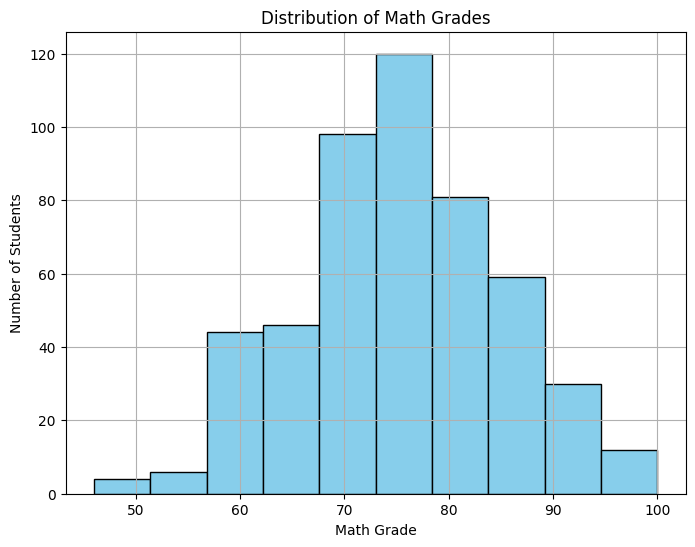

In [7]:
plt.figure(figsize=(8, 6))
plt.hist(data['Grade_Math'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Math Grades')
plt.xlabel('Math Grade')
plt.ylabel('Number of Students')
plt.grid(True)
plt.show()

## Bar Chart : Favorite_Subject

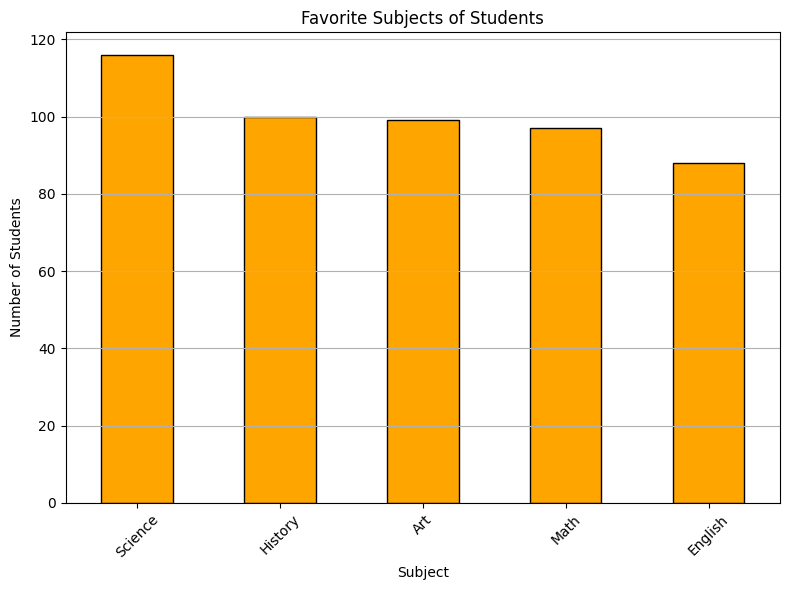

In [8]:
subject_counts = data['Favorite_Subject'].value_counts()

plt.figure(figsize=(8, 6))
subject_counts.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Favorite Subjects of Students')
plt.xlabel('Subject')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Box Plot : Study_Hours vs Gender

C:\Users\suthi\AppData\Local\Temp\ipykernel_28584\2797584868.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Gender', y='Study_Hours', palette='pastel')


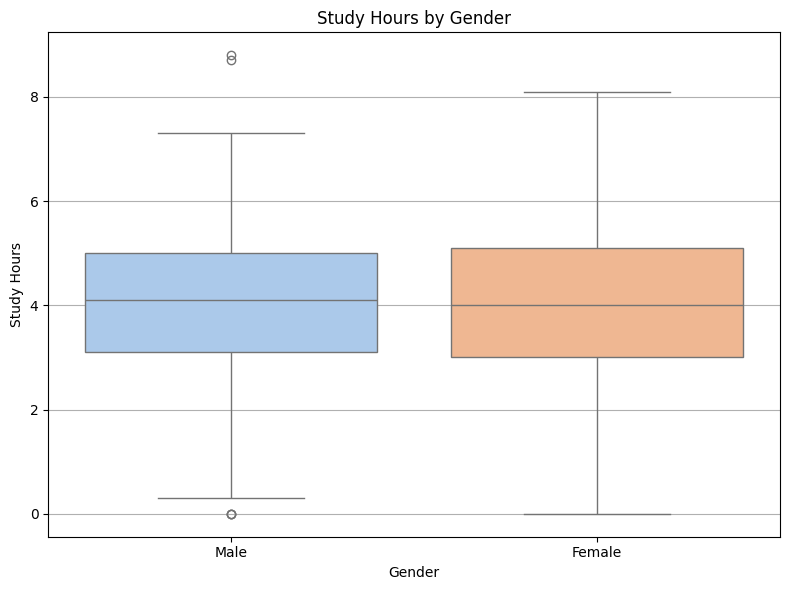

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Gender', y='Study_Hours', palette='pastel')
plt.title('Study Hours by Gender')
plt.xlabel('Gender')
plt.ylabel('Study Hours')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

## Pie Chart : Favorite_Subject

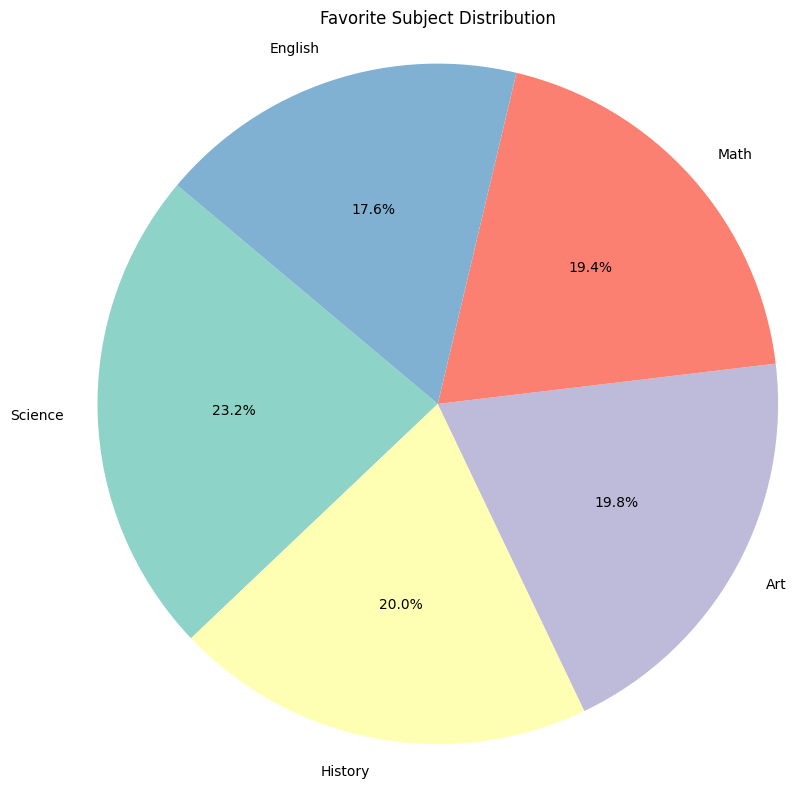

In [10]:
subject_counts = data['Favorite_Subject'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(subject_counts, labels=subject_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Favorite Subject Distribution')
plt.axis('equal')  # Equal aspect ratio for a perfect circle
plt.tight_layout()
plt.show()

## Scatter Plot : Study_Hours vs Grade_Math

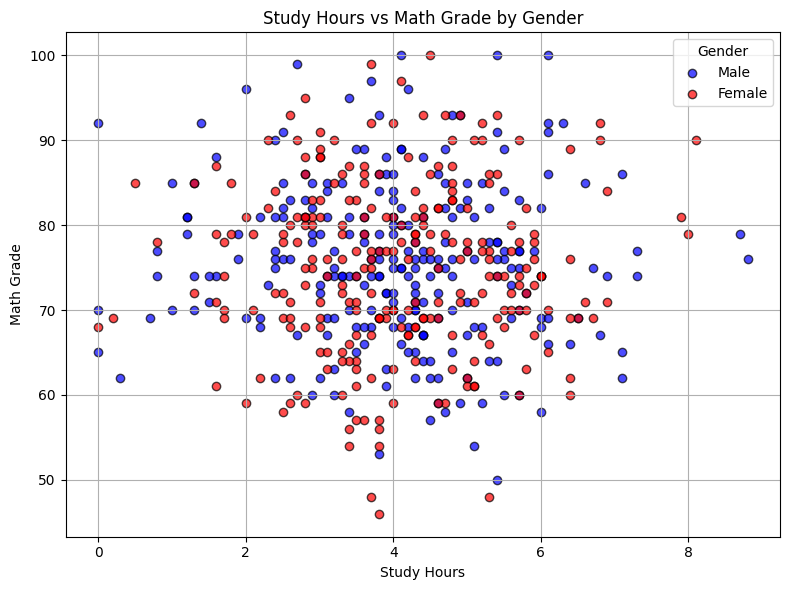

In [11]:
colors = {'Male': 'blue', 'Female': 'red'}

plt.figure(figsize=(8, 6))

# วนลูปตามกลุ่ม Gender เพื่อแยกสี
for gender in data['Gender'].unique():
    subset = data[data['Gender'] == gender]
    plt.scatter(subset['Study_Hours'], subset['Grade_Math'],
                alpha=0.7,
                color=colors[gender],
                edgecolors='k',
                label=gender)

plt.title('Study Hours vs Math Grade by Gender')
plt.xlabel('Study Hours')
plt.ylabel('Math Grade')
plt.grid(True)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

## Pair Plot : Grade_*, Study_Hours, Absences

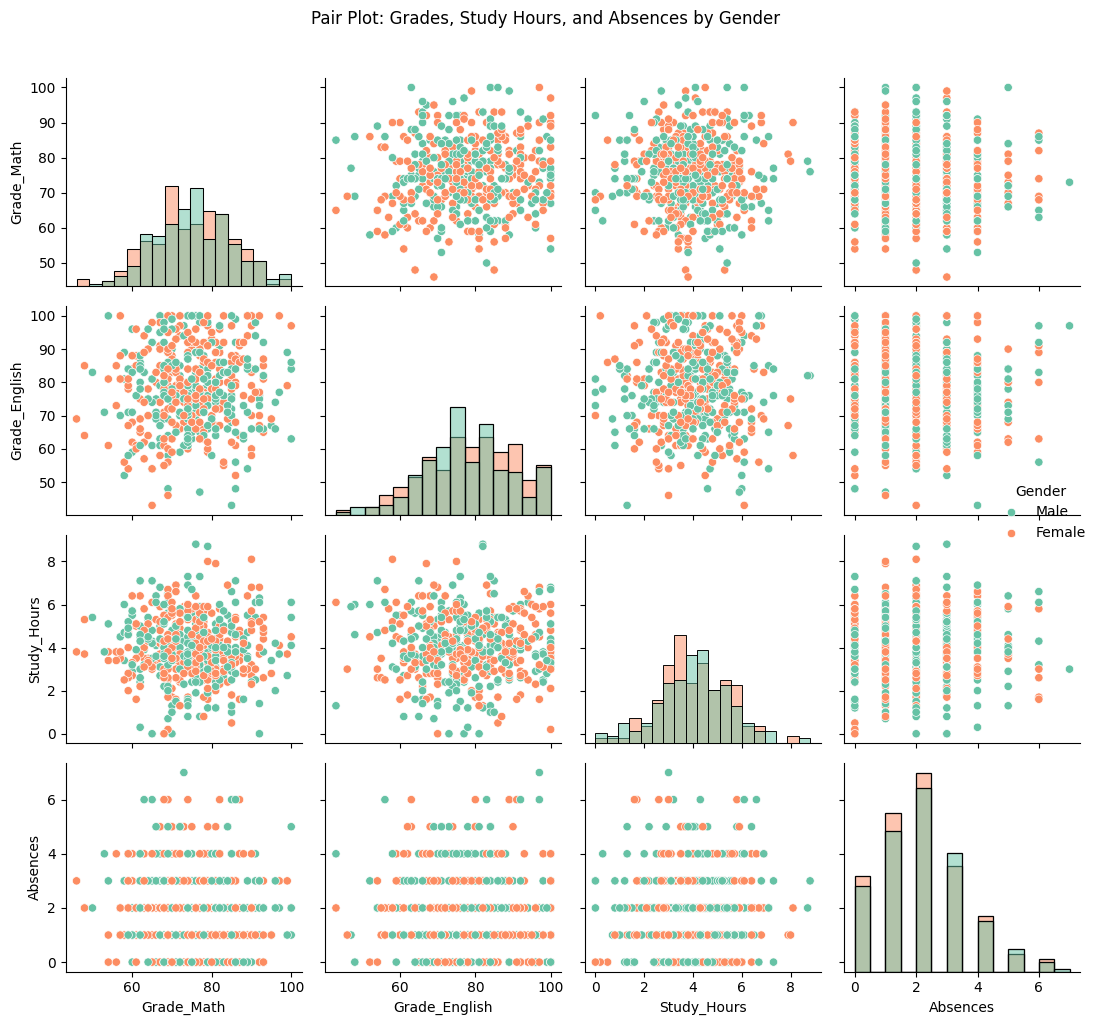

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['Grade_Math', 'Grade_English', 'Study_Hours', 'Absences', 'Gender']

# สร้าง pairplot โดยใช้ hue ตามเพศ
sns.pairplot(data[columns_to_plot], hue='Gender', diag_kind='hist', palette='Set2')

plt.suptitle('Pair Plot: Grades, Study Hours, and Absences by Gender', y=1.02)
plt.tight_layout()
plt.show()


## Line Chart : Student_ID vs Grade_Math

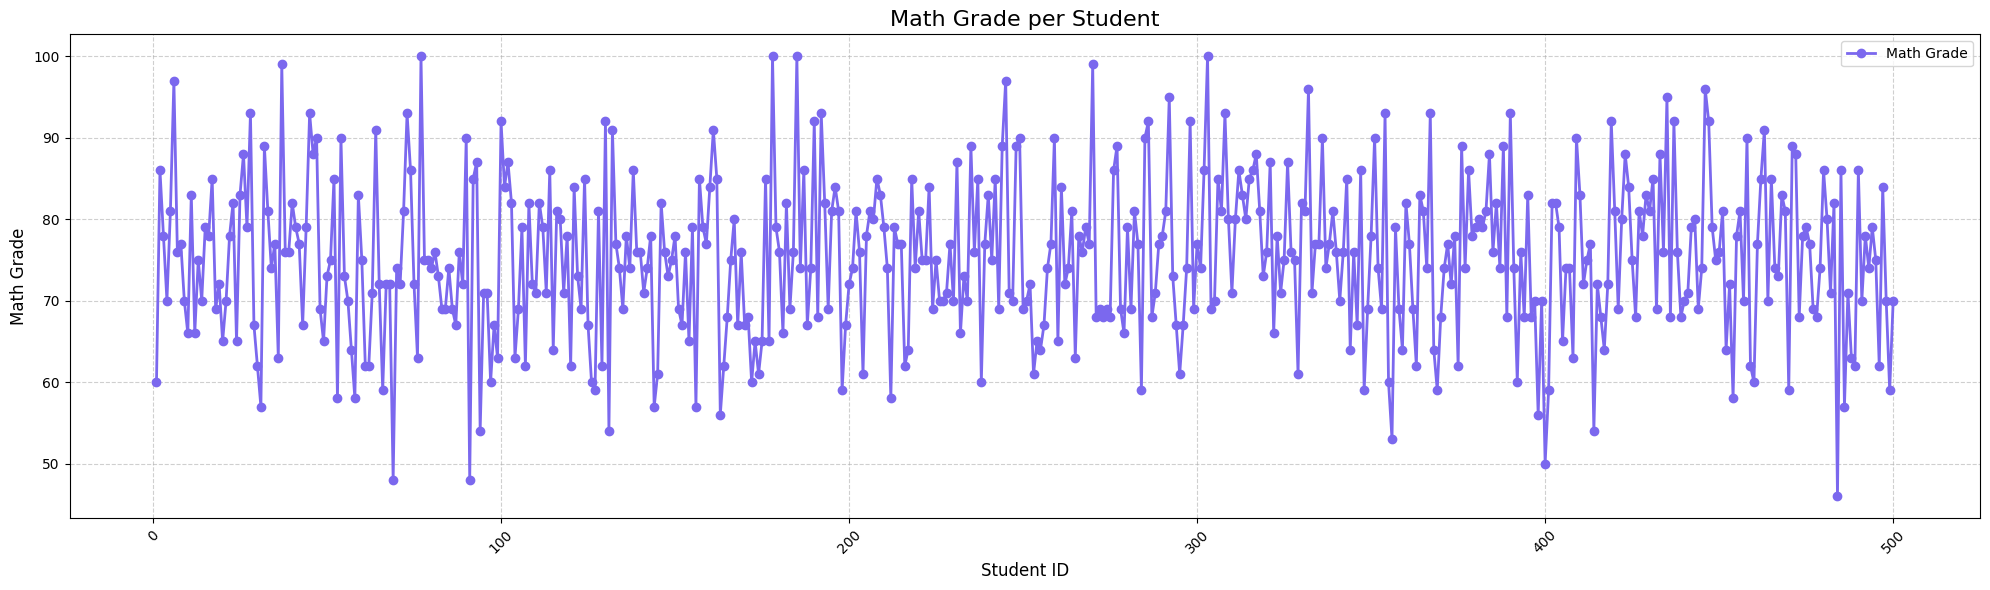

In [13]:
# จัดเรียงข้อมูลตาม Student_ID (หากยังไม่ได้จัดเรียง)
df_sorted = data.sort_values(by='Student_ID')

plt.figure(figsize=(20, 6))
plt.plot(
    df_sorted['Student_ID'],
    df_sorted['Grade_Math'],
    marker='o',
    linestyle='-',
    color='mediumslateblue',
    linewidth=2,
    markersize=6,
    label='Math Grade'
)

plt.title('Math Grade per Student', fontsize=16)
plt.xlabel('Student ID', fontsize=12)
plt.ylabel('Math Grade', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# แสดงผล
plt.show()

## Violin Plot : Grade_English vs Gender

C:\Users\suthi\AppData\Local\Temp\ipykernel_28584\2856792796.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


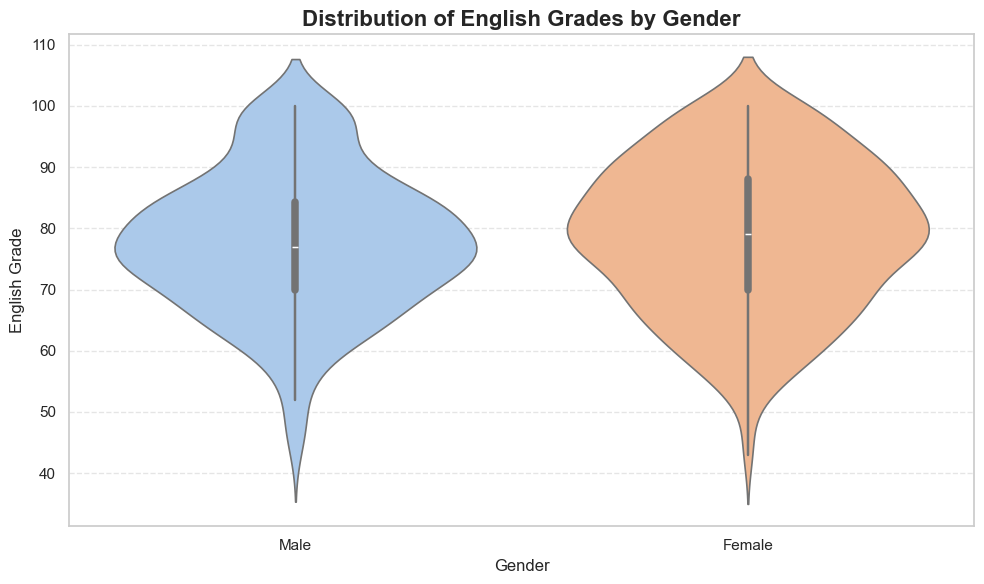

In [14]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.violinplot(
    data=data,
    x='Gender',
    y='Grade_English',
    palette='pastel',
    inner='box',
    linewidth=1.2
)

plt.title('Distribution of English Grades by Gender', fontsize=16, weight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('English Grade', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Heatmap : Correlation Matrix

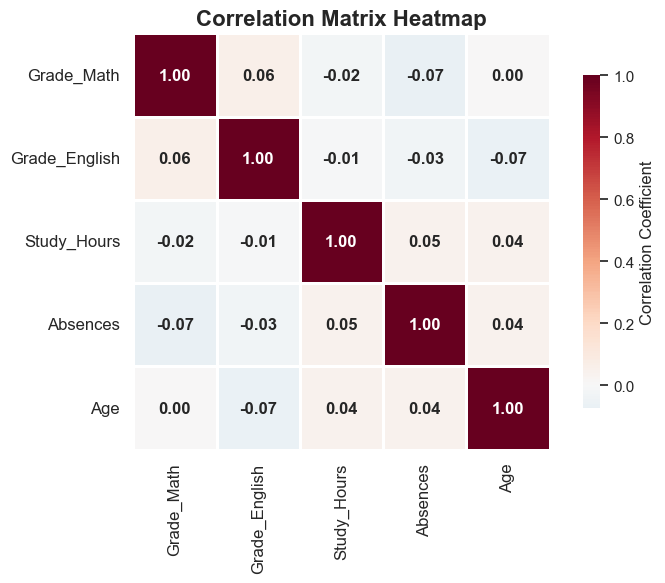

In [15]:
numeric_cols = ['Grade_Math', 'Grade_English', 'Study_Hours', 'Absences', 'Age']

# คำนวณ correlation matrix
corr = data[numeric_cols].corr()

sns.set(style="white")

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='RdBu_r',            # สีแดงน้ำเงินสลับ (ชัดเจน)
    center=0,
    square=True,
    linewidths=0.8,
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
    annot_kws={"size": 12, "weight": 'bold'}
)

plt.title('Correlation Matrix Heatmap', fontsize=16, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## Strip Plot : Grade_Math vs Gender

C:\Users\suthi\AppData\Local\Temp\ipykernel_28584\2345799270.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(
C:\Users\suthi\AppData\Local\Temp\ipykernel_28584\2345799270.py:4: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


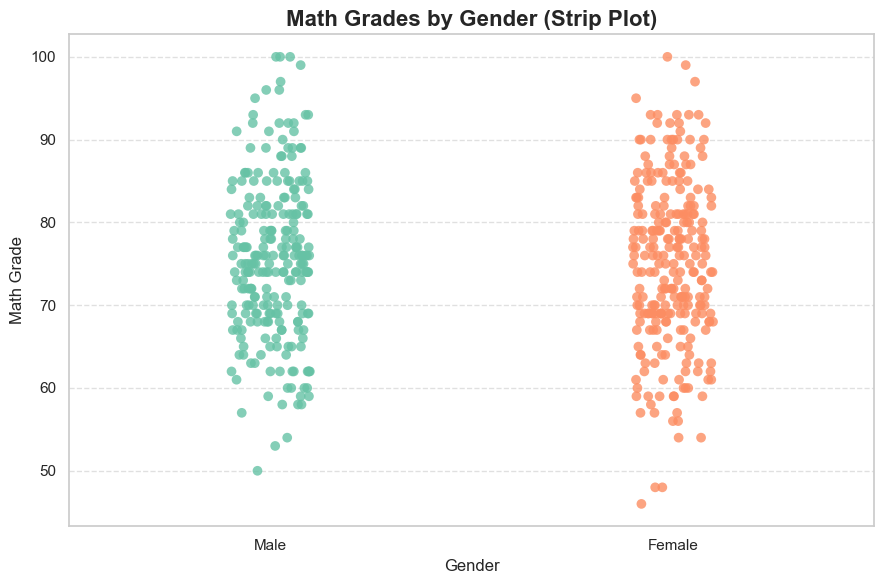

In [16]:
sns.set(style="whitegrid")

plt.figure(figsize=(9, 6))
sns.stripplot(
    data=data,
    x='Gender',
    y='Grade_Math',
    jitter=True,
    palette='Set2',
    edgecolor='gray',
    size=7,
    alpha=0.8
)

plt.title('Math Grades by Gender (Strip Plot)', fontsize=16, weight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Math Grade', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()